In [2]:
# from monday:

import requests
import json

lat = 41.3645 # woodbury, ny
lon = -74.1060
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")
                      
json_file = genius.json()
json_file

forecast = json_file['properties']['forecast'] # accessing nested dictionary value

new_request = requests.get(forecast)
json = new_request.json()
json

forecasts = json['properties']['periods']
forecasts

[{'number': 1,
  'name': 'This Afternoon',
  'startTime': '2023-03-16T15:00:00-04:00',
  'endTime': '2023-03-16T18:00:00-04:00',
  'isDaytime': True,
  'temperature': 51,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': None},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -3.3333333333333335},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 39},
  'windSpeed': '8 mph',
  'windDirection': 'W',
  'icon': 'https://api.weather.gov/icons/land/day/few?size=medium',
  'shortForecast': 'Sunny',
  'detailedForecast': 'Sunny, with a high near 51. West wind around 8 mph.'},
 {'number': 2,
  'name': 'Tonight',
  'startTime': '2023-03-16T18:00:00-04:00',
  'endTime': '2023-03-17T06:00:00-04:00',
  'isDaytime': False,
  'temperature': 35,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': None},
  'dewpoint': {'unitCode': 'wmoU

In [3]:
import csv

new_file = open("weather.csv", "w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(new_file)
csv_writer.writerow(["Time", "Temperature", "Description"])

for i in forecasts:
    
    time = i.get('name')
    temperature = i.get('temperature')
    unit = i.get('temperatureUnit')
    detail = i.get('detailedForecast')
    
    print(time)
    print(f"{temperature}{unit}")
    print(detail)
    
    csv_writer.writerow([time, temperature, detail])
    
new_file.close()

This Afternoon
51F
Sunny, with a high near 51. West wind around 8 mph.
Tonight
35F
Partly cloudy, with a low around 35. Southwest wind around 6 mph.
Friday
52F
Scattered rain showers after 8am. Mostly cloudy, with a high near 52. South wind 3 to 13 mph. Chance of precipitation is 30%.
Friday Night
33F
Scattered rain showers. Mostly cloudy. Low around 33, with temperatures rising to around 36 overnight. West wind 9 to 15 mph. Chance of precipitation is 40%.
Saturday
48F
Isolated rain showers before 8am. Partly sunny. High near 48, with temperatures falling to around 46 in the afternoon. West wind 9 to 15 mph. Chance of precipitation is 20%.
Saturday Night
26F
Partly cloudy. Low around 26, with temperatures rising to around 28 overnight.
Sunday
37F
Mostly sunny, with a high near 37.
Sunday Night
25F
Mostly clear, with a low around 25.
Monday
47F
Sunny, with a high near 47.
Monday Night
27F
Mostly clear, with a low around 27.
Tuesday
52F
Sunny, with a high near 52.
Tuesday Night
30F
Mostl

In [6]:
import pandas as pd
weather = pd.read_csv("weather.csv")
weather

,Time,Temperature,Description
0,This Afternoon,51,"Sunny, with a high near 51. West wind around 8..."
1,Tonight,35,"Partly cloudy, with a low around 35. Southwest..."
2,Friday,52,Scattered rain showers after 8am. Mostly cloud...
3,Friday Night,33,Scattered rain showers. Mostly cloudy. Low aro...
4,Saturday,48,Isolated rain showers before 8am. Partly sunny...
5,Saturday Night,26,"Partly cloudy. Low around 26, with temperature..."
6,Sunday,37,"Mostly sunny, with a high near 37."
7,Sunday Night,25,"Mostly clear, with a low around 25."
8,Monday,47,"Sunny, with a high near 47."
9,Monday Night,27,"Mostly clear, with a low around 27."


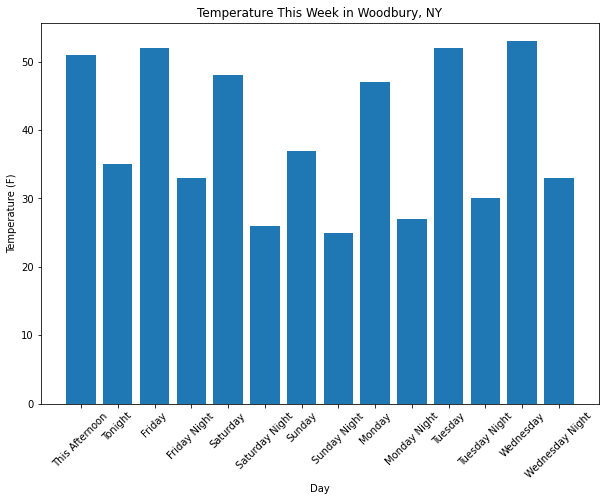

In [15]:
from matplotlib import pyplot as plt
import numpy as np

df = pd.DataFrame(weather)

time = df["Time"]
temp = df["Temperature"]

fig = plt.figure(figsize = (10, 7))
plt.bar(time, temp)

plt.xlabel("Day")
plt.ylabel("Temperature (F)")
plt.title("Temperature This Week in Woodbury, NY")

plt.xticks(rotation = 45) # source: https://stackabuse.com/rotate-axis-labels-in-matplotlib/

plt.show()

In [37]:
# below are the two parameters needed to retrieve the data:

country = "US"
year = 2023

# the following calls all return different information

# storing all of their links in variables so they can be called more easily:

info = f"https://date.nager.at/api/v3/CountryInfo/{country}"

countries = f"https://date.nager.at/api/v3/AvailableCountries"

weekends = f"https://date.nager.at/api/v3/LongWeekend/{year}/{country}"

holidays = f"https://date.nager.at/api/v3/PublicHolidays/{year}/{country}"

today = f"https://date.nager.at/api/v3/PublicHolidays/{year}/{country}"

next_holi = f"https://date.nager.at/api/v3/NextPublicHolidays/{country}"

worldwide = f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide"


In [38]:
get_country_info = requests.get(info) # sends a request to the url to retrieve the API data
country_info = get_country_info.json() # storing the data in json format

country_info # printing out the data in the json - dictionary format

{'commonName': 'United States',
 'officialName': 'United States of America',
 'countryCode': 'US',
 'region': 'Americas',
 'borders': [{'commonName': 'Canada',
   'officialName': 'Canada',
   'countryCode': 'CA',
   'region': 'Americas',
   'borders': None},
  {'commonName': 'Mexico',
   'officialName': 'United Mexican States',
   'countryCode': 'MX',
   'region': 'Americas',
   'borders': None}]}

In [39]:
get_all_countries = requests.get(countries) # sends a request to the url to retrieve the API data
all_countries = get_all_countries.json() # storing the data in json format

all_countries # printing out the data in the json - dictionary format

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [40]:
get_all_weekends = requests.get(weekends) # sends a request to the url to retrieve the API data
long_weekends = get_all_weekends.json() # storing the data in json format

long_weekends # printing out the data in the json - dictionary format

[{'startDate': '2022-12-31',
  'endDate': '2023-01-02',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-01-14',
  'endDate': '2023-01-16',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-02-18',
  'endDate': '2023-02-20',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-05-27',
  'endDate': '2023-05-29',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-06-17',
  'endDate': '2023-06-19',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-07-01',
  'endDate': '2023-07-04',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-09-02',
  'endDate': '2023-09-04',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-11-10',
  'endDate': '2023-11-12',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-11-23',
  'endDate': '2023-11-26',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-12-23',
  'endDate': '2023-12-25',
  'dayCount': 3,
  'needBridgeDay': False}]

In [41]:
get_public_holi = requests.get(holidays) # sends a request to the url to retrieve the API data
public_holidays = get_public_holi.json() # storing the data in json format

public_holidays # printing out the data in the json - dictionary format

[{'date': '2023-01-02',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-01-16',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-20',
  'localName': 'Presidents Day',
  'name': "Washington's Birthday",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-

In [42]:
get_today_status = requests.get(today) # sends a request to the url to retrieve the API data
today_status = get_today_status.json() # storing the data in json format

today_status # printing out the data in the json - dictionary format

[{'date': '2023-01-02',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-01-16',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-20',
  'localName': 'Presidents Day',
  'name': "Washington's Birthday",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-

In [43]:
get_next_holi = requests.get(next_holi) # sends a request to the url to retrieve the API data
next_holiday = get_next_holi.json() # storing the data in json format

next_holiday # printing out the data in the json - dictionary format

[{'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-29',
  'localName': 'Memorial Day',
  'name': 'Memorial Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-06-19',
  'localName': 'Juneteenth',
  'name': 'Juneteenth',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 2021,
  'types': ['Public']},
 {'date': '2023-07-04',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-09-04',
  'localName': 'Labor Day',
  'name'

In [44]:
get_worldwide = requests.get(worldwide) # sends a request to the url to retrieve the API data
worldwide_holidays = get_worldwide.json() # storing the data in json format

worldwide_holidays # printing out the data in the json - dictionary format

[{'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'CA',
  'fixed': True,
  'global': False,
  'counties': ['CA-NL'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'GB',
  'fixed': True,
  'global': False,
  'counties': ['GB-NIR'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': 'Lá Fhéile Pádraig',
  'name': "Saint Patrick's Day",
  'countryCode': 'IE',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': 1903,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'MS',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'Josefstag',
  'name': "Saint Joseph's Day",
  'countryCode': 'CH',
  'fix

In [59]:
year = 2023
countries_choice = ["US", "AU", "BS", "CN", "DE", "RU", "ZA", "PT", "MX", "JP"]

all_holidays = []

for i in countries_choice:
    
    holidays = f"https://date.nager.at/api/v3/PublicHolidays/{year}/{i}"
    get_public_holi = requests.get(holidays)
    public_holidays = get_public_holi.json()

    public_holidays
    
    for i in public_holidays:
    
        name = i.get("localName")
        all_holidays.append(name)
    
print(all_holidays)
print("The list has " + str(len(all_holidays)) + " holidays total")

["New Year's Day", 'Martin Luther King, Jr. Day', 'Presidents Day', 'Good Friday', 'Good Friday', 'Memorial Day', 'Juneteenth', 'Independence Day', 'Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day', "New Year's Day", 'Australia Day', 'Labour Day', 'Canberra Day', 'March Public Holiday', 'Eight Hours Day', 'Labour Day', 'Good Friday', 'Easter Eve', 'Easter Sunday', 'Easter Monday', 'Anzac Day', 'May Day', 'Labour Day', 'Reconciliation Day', 'Western Australia Day', "Queen's Birthday", 'Picnic Day', 'Labour Day', 'Christmas Day', 'Boxing Day', "New Year's Day", 'Majority Rule Day', 'Perry Christie Day', 'Good Friday', 'Easter Monday', 'Whit Monday', 'Independence Day', 'Emancipation Day', "National Heroes' Day", 'Christmas Day', 'Boxing Day', '元旦', '春节', '清明节', '劳动节', '端午节', '中秋节', '国庆节', 'Neujahr', 'Heilige Drei Könige', 'Internationaler Frauentag', 'Karfreitag', 'Ostersonntag', 'Ostermontag', 'Tag der Arbeit', 'Christi Himmelfahrt', 'Pfingstsonntag', 'Pfi